In [143]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
V = 'Dubai'
T1 = 'CSK'
T2 = 'SRH'

In [156]:
df = pd.read_excel("IPL_T20_D11.xlsx")

df = df.dropna().reset_index(drop=True)
df.drop('Match', axis=1, inplace=True)

Venues = sorted(list(df['Venue'].unique()))
Teams = sorted(list(df['Team'].unique()))
print(Venues,Teams)

# Validation
df1 = df[df['Date']=='2020-10-02']
df = df[~(df.index.isin(df1.index))]
df1 = df1.groupby(['Team']).mean().reset_index().T.drop('Team', axis=0)
df1.rename({0:T1,1:T2},axis=1,inplace=True)
df1

A = df.groupby(['Inn']).mean().reset_index().T
A.rename({0:'IPL_1stInn',1:'IPL_2ndInn'},axis=1,inplace=True)

B = df.groupby(['Venue']).mean().reset_index()
B = B[B['Venue']==V].drop('Venue', axis=1).reset_index(drop=True).T
B.rename({0:V+'_perf'},axis=1,inplace=True)

C = df.groupby(['Team']).mean().reset_index()
C = C[C['Team'].isin([T1,T2])].sort_values('Team').reset_index(drop=True).T.drop('Team', axis=0)
C.rename({0:T1+'_perf',1:T2+'_perf'},axis=1,inplace=True)

D = df.groupby(['Venue','Inn']).mean().reset_index()
D = D[D['Venue']==V].drop('Venue', axis=1).reset_index(drop=True).T
D.rename({0:V+'_1stInn',1:V+'_2ndInn'},axis=1,inplace=True)

E = df.groupby(['Team','Inn']).mean().reset_index()
E1 = E[E['Team']==T1].drop('Team', axis=1).reset_index(drop=True).T
E1.rename({0:T1+'_1stInn',1:T1+'_2ndInn'},axis=1,inplace=True)
E2 = E[E['Team']==T2].drop('Team', axis=1).reset_index(drop=True).T
E2.rename({0:T2+'_1stInn',1:T2+'_2ndInn'},axis=1,inplace=True)

# # Predict
# F = pd.concat([A,B,C,D,E1,E2],axis=1)

# Validate
F = pd.concat([A,B,C,D,E1,E2,df1],axis=1).drop('Inn', axis=0)
F

['Abu Dhabi', 'Dubai', 'Sharjah'] ['CSK', 'DC', 'KKR', 'KXIP', 'MI', 'RCB', 'RR', 'SRH']


,IPL_1stInn,IPL_2ndInn,Dubai_perf,CSK_perf,SRH_perf,Dubai_1stInn,Dubai_2ndInn,CSK_1stInn,SRH_1stInn,SRH_2ndInn,CSK,SRH
OpenP,1.07692,0.538462,1.000000,0.333333,0.666667,1.5,0.5,0.333333,1,0,1,1
WKP,0.692308,0.769231,0.666667,0.666667,1,0.5,0.833333,0.666667,1,1,1,0
Bat,1,0.923077,0.916667,2,1.66667,1,0.833333,2,1.5,2,0,3
ARP,0.846154,0.923077,0.916667,1,0,1.16667,0.666667,1,0,0,1,1
SpinP,0.923077,0.384615,0.666667,0.666667,0.666667,1,0.333333,0.666667,1,0,0,0
PaceP,1.61538,1.30769,1.333333,1,1.33333,1.5,1.16667,1,1.5,1,2,1
Frgnr,2.38462,1.84615,1.916667,2.33333,2.33333,2.33333,1.5,2.33333,3,1,1,1
AvgOpen,63.1154,37.1538,43.958333,23,39.6667,53.75,34.1667,23,54,11,21.5,43
AvgWK,51.6538,39.4615,42.583333,31.3333,70.3333,41.3333,43.8333,31.3333,55,101,71,8
AvgBat,30.6449,27.3462,25.805556,49.5556,27.6,33.4444,18.1667,49.5556,24.2333,34.3333,10,42


(array([4., 0., 2., 0., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

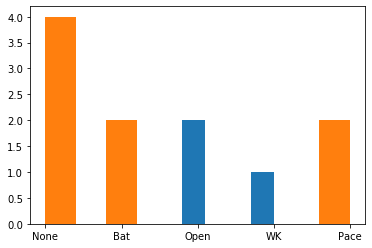

In [42]:
plt.hist(df[df['Venue']==V]['C'])
plt.hist(df[df['Venue']==V]['VC'])

(array([6., 0., 0., 0., 0., 0., 2., 0., 3., 1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

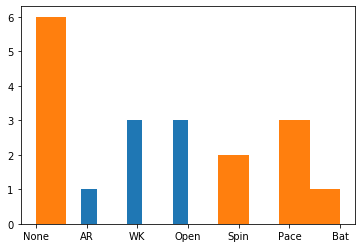

In [47]:
plt.hist(df[df['Inn']=='First']['C'])
plt.hist(df[df['Inn']=='First']['VC'])

(array([2., 0., 6., 0., 1., 0., 1., 0., 1., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

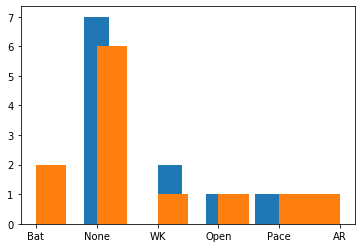

In [48]:
plt.hist(df[df['Inn']=='Second']['C'])
plt.hist(df[df['Inn']=='Second']['VC'])